---

<center><h1>Online Retail Customer Segmentation </h1></center>

---

## 1) Understanding Problem Statement
---

Problem Statement:
Online retailers have a vast customer base with diverse shopping behaviors. To enhance customer engagement, there is a need to segment customers into distinct groups based on their recency, frequency and monetary (RFM) characteristics.

Approach:
preprocessing the existing online retail transaction data, calculating RFM metrics, applying *K-Means and DBSCAN clustering for customer segmentation, interpreting and labeling clusters, enhance customer engagement and Developing a recommendation system based on user purchasing patterns.

Objective:
To effectively segment online retail customers based on their RFM characteristics using clustering techniques (K-Means and DBSCAN) to boost revenue, enhance customer retention, optimize inventory management and increase overall customer satisfaction.

## 2) Understanding concept of RFM Analysis
---

### Recency Frequency Monetary (RFM) Analysis

RFM Analysis is a **customer segmentation technique** used by businesses to better understand and categorize their customers based on their **past purchasing behavior**. This approach helps companies identify and target specific customer groups for marketing and personalization efforts. Here's a breakdown of the three components of RFM Analysis:

1. **Recency (R):** Recency refers to **how recently a customer has made a purchase or interacted with your business**. It is typically measured in terms of the **number of days since the last purchase or interaction**. Customers who have engaged with your business **more recently** are often considered **more valuable** because they are more likely to make repeat purchases.


2. **Frequency (F):** Frequency measures **how often a customer makes purchases or interacts with your business** over a specific period such as a year. It represents **customer loyalty and engagement**. Customers who buy from you frequently are more likely to be loyal and responsive to promotions.


3. **Monetary (M):** Monetary represents the **total amount of money a customer has spent on your products or services**. It helps determine the **value or profitability of each customer**. Customers who have **spent more money** are typically considered **high-value customers**.


<br>







## 3) Getting System Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

from scipy.stats import skew
from itertools import product
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 4) Understanding the Data

In [2]:
retail = pd.read_csv(r"C:\Users\Alrowad\Desktop\retail.csv")
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
print(" ")
retail.info()


 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
print('The size of Dataframe is: ', retail.shape)


The size of Dataframe is:  (1067371, 8)


In [5]:
numeric_features = [feature for feature in retail.columns if retail[feature].dtype != 'O']
categorical_features = [feature for feature in retail.columns if retail[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print(" ")
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Quantity', 'Price', 'Customer ID']
 
We have 5 categorical features : ['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Country']


### Data Description

- **Invoice:** Invoice number. A unique number for each transaction. If it starts with C which means cancelled operations.

- **StockCode:** Product code. A unique number for each product.

- **Description:** Product name.

- **Quantity:** It refers to how many of the products in the invoices have been sold.

- **InvoiceDate:** Invoice date.

- **Price:** Product price (pound)

- **Customer ID:** Unique customer number.

- **Country:** The name of the country where the customer lives.

In [6]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print(" ")
total=retail.isnull().sum().sort_values(ascending=False)
percent=(retail.isnull().sum()/retail.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
 


,Total,Percent
Customer ID,243007,22.766873
Description,4382,0.410541
StockCode,0,0.000000
Invoice,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
Price,0,0.000000
Country,0,0.000000


In [7]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print(" ")
retail.describe()

Summary Statistics of numerical features for DataFrame are as follows:
 


,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [8]:

print('Summary Statistics of categorical features for DataFrame are as follows:')
print(" ")
retail.describe(include= 'object')

Summary Statistics of categorical features for DataFrame are as follows:
 


,Invoice,StockCode,Description,InvoiceDate,Country
count,1067371,1067371,1062989,1067371,1067371
unique,53628,5305,5698,47635,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-06 16:57:00,United Kingdom
freq,1350,5829,5918,1350,981330


In [9]:
print('='*25)
print('Checking records for mis-spell, typo-error etc.')
print('='*25)

print("'Invoice' variable have {} unique category : \n{}\n".format(retail['Invoice'].nunique(), retail['Invoice'].unique()))
print('='*25)

print("'StockCode' variable have {} unique category : \n{}\n".format(retail['StockCode'].nunique(), retail['StockCode'].unique()))
print('='*25)

print("'Description' variable have {} unique category : \n{}\n".format(retail['Description'].nunique(), retail['Description'].unique()))
print('='*25)

print("'Country' variable have {} unique category : \n{}\n".format(retail['Country'].nunique(), retail['Country'].unique()))
print('-'*125)

Checking records for mis-spell, typo-error etc.
'Invoice' variable have 53628 unique category : 
['489434' '489435' '489436' ... '581585' '581586' '581587']

'StockCode' variable have 5305 unique category : 
['85048' '79323P' '79323W' ... '23609' '23617' '23843']

'Description' variable have 5698 unique category : 
['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'mixed up'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

'Country' variable have 43 unique category : 
['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 'Bahrain' 'RSA' 'Bermuda' 'Hong Kong' 'Singapore' 'Thailand' 'Israel'
 'Lithuania' 'West Indies' 'Lebanon' 'Korea' 'Brazil' 'Canada' 'Iceland'
 'Saudi Arabia' 'Czech Republic' 'Euro

## 5) Data Cleaning & Preprocessing
---

### Missing Value Treatment

In [10]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print(" ")
total=retail.isnull().sum().sort_values(ascending=False)
percent=(retail.isnull().sum()/retail.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
 


,Total,Percent
Customer ID,243007,22.766873
Description,4382,0.410541
StockCode,0,0.000000
Invoice,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
Price,0,0.000000
Country,0,0.000000


*22.76%* of Customer ID is missing. Drop the columns as primary information Customer ID is missing.


#### Dropping empty Customer ID

In [11]:
retail = retail.dropna()
retail.shape

(824364, 8)

In [12]:
retail['Customer ID'] = retail['Customer ID'].astype(str)

In [13]:
retail.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID     object
Country         object
dtype: object

### Removing invalid entries from columns

Price and Quantity must be positive values i.e. greater than 0)

In [14]:
(retail['Price']<=0).value_counts()

Price
False    824293
True         71
Name: count, dtype: int64

- There exists **invalid values** for Price column. **71 row entries** are less than or equal to 0**

In [15]:
retail.shape

(824364, 8)

In [16]:
retail = retail[retail['Price']>0]

In [17]:
retail.shape

(824293, 8)

In [18]:
(retail['Quantity']<=0).value_counts()

Quantity
False    805549
True      18744
Name: count, dtype: int64

There exists **invalid values** for Quantity column. **18744 row entries** are negative (less than 0). We need to drop these rows**

In [19]:
retail.shape

(824293, 8)

In [20]:
retail = retail[retail['Quantity']>=0]

In [21]:
retail.shape

(805549, 8)

In [22]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 6) RFM Metrics &  Scores Calculation
---

### RFM Attribute Creation(Feature Engineering)

- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

#### New Attribute Creation: Monetary

In [23]:
retail['Amount'] = retail['Quantity']*retail['Price']
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [24]:
rfm_m = retail.groupby('Customer ID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.columns = ['Customer ID', 'Monetary']
rfm_m.head()

,Customer ID,Monetary
0,12346.0,77556.46
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4428.69
4,12350.0,334.40


#### New Attribute Creation: Frequency

In [25]:
rfm_f = retail.groupby('Customer ID')['Invoice'].count()
rfm_f = rfm_f.reset_index()
rfm_f.head()

,Customer ID,Invoice
0,12346.0,34
1,12347.0,253
2,12348.0,51
3,12349.0,175
4,12350.0,17


In [26]:
rfm_f.columns = ['Customer ID', 'Frequency']
rfm_f.head()

,Customer ID,Frequency
0,12346.0,34
1,12347.0,253
2,12348.0,51
3,12349.0,175
4,12350.0,17


In [27]:
rfm = pd.merge(rfm_m, rfm_f, on='Customer ID', how='inner')
rfm.head()

,Customer ID,Monetary,Frequency
0,12346.0,77556.46,34
1,12347.0,5633.32,253
2,12348.0,2019.40,51
3,12349.0,4428.69,175
4,12350.0,334.40,17


#### New Attribute Creation: Recency

In [28]:
retail.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID     object
Country         object
Amount         float64
dtype: object

- InvoiceDate is not in datetime datatype. Here, need for DataType Conversion

In [29]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [30]:
retail.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
Amount                float64
dtype: object

In [31]:
# Getting Data range

min_date = min(retail['InvoiceDate'])
max_date = max(retail['InvoiceDate'])

print(min_date,max_date)

2009-12-01 07:45:00 2011-12-09 12:50:00


In [32]:
# Compute the difference between max date and transaction date

retail['Diff_Days'] = max_date - retail['InvoiceDate']
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount,Diff_Days
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,738 days 05:05:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,738 days 05:05:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,738 days 05:05:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,738 days 05:05:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,738 days 05:05:00


In [33]:
# Compute last transaction date to get the recency of customers

rfm_r = retail.groupby('Customer ID')['Diff_Days'].min()
rfm_r = rfm_r.reset_index()
rfm_r.head()

,Customer ID,Diff_Days
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [34]:
# Extract number of days only

rfm_r['Diff_Days'] = rfm_r['Diff_Days'].dt.days
rfm_r.head()

,Customer ID,Diff_Days
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [35]:
# Merge all the newly created attribute to get the final RFM dataframe

rfm = pd.merge(rfm,rfm_r, on='Customer ID', how='inner')
rfm.columns = ['Customer ID', 'Monetary', 'Frequency', 'Recency']
rfm.head()

,Customer ID,Monetary,Frequency,Recency
0,12346.0,77556.46,34,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4428.69,175,18
4,12350.0,334.40,17,309


In [36]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Monetary,5878.0,3018.616737,14737.731040,2.95,348.7625,898.915,2307.09,608821.65
Frequency,5878.0,137.044743,353.818629,1.00,21.0000,53.000,142.00,12890.00
Recency,5878.0,200.331916,209.338707,0.00,25.0000,95.000,379.00,738.00


In [38]:
rfm.shape

(5878, 4)

**`Note:`** There are 5878 unique count of customers.

### Calculating RFM Scores using RFM Metrics

In [39]:
rfm_scores = rfm.copy()

In [40]:
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency
0,12346.0,77556.46,34,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4428.69,175,18
4,12350.0,334.40,17,309


### For each RFM dimension, score can be calculated in:

We are going to implement percentile-based grouping for each RFM dimension. Later combined label is created using these each RFM dimension.

Process of calculating percentiles:

-Sort customers based on that metric
-Break customers into a pre-defined number of groups of equal size
-Assign a label to each group
-Individual RFM dimension label:



For each RFM dimension, assign labels to the categories based on the behavior
  we want to capture. These labels should be intuitive and provide insight into customer behavior. Here's an example for each dimension:

Recency (R):

Label 5: "Very Recent"

Label 4: "Recent"

Label 3: "Moderate"

Label 2: "Infrequent"

Label 1: "Very Infrequent"

Frequency (F):

Label 5: "Very Frequent"

Label 4: "Frequent"

Label 3: "Moderate"

Label 2: "Infrequent"

Label 1: "Very Infrequent"

Monetary (M):

Label 5: "High Spending"

Label 4: "Above Average Spending"

Label 3: "Average Spending"

Label 2: "Below Average Spending"

Label 1: "Low Spending"

Combined RFM Labels:
Once we have assigned labels to the categories for each RFM dimension, you can create a combined RFM label for each customer by concatenating the individual dimension labels or by adding individual dimension scores. FOR EXAMPLE:


If a customer has R=4, F=5, and M=3, their combined RFM label would be "Recent-Very Frequent-Average Spending."
We will rate Recency customer who have been active more recently better than the less recent customer,because each company wants its customers to be recent

We will rate Frequency and Monetary Value higher label because we want Customer to spend more money and visit more often (that is different order than recency).

### Creating Individual RFM Dimension label


In [41]:
#Date from customer's last purchase.The nearest date gets 5 and the furthest date gets 1.
rfm_scores['Recency_Score'] = pd.qcut(rfm_scores['Recency'],5,labels=[5,4,3,2,1])
# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 5.
rfm_scores['Frequency_Score'] = pd.qcut(rfm_scores['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
#Total spend by the customer.The least money gets 1, the most money gets 5.
rfm_scores['Monetary_Score'] = pd.qcut(rfm_scores['Monetary'],5,labels=[1,2,3,4,5])

In [42]:
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score
0,12346.0,77556.46,34,325,2,2,5
1,12347.0,5633.32,253,1,5,5,5
2,12348.0,2019.40,51,74,3,3,4
3,12349.0,4428.69,175,18,5,4,5
4,12350.0,334.40,17,309,2,2,2


- **`Best Recency score = 5:` most recently purchase.**
- **`Best Frequency score = 5:` most number of purchase.**
- **`Best Monetary score = 5:` spent the most.**

### Creating Combined RFM Label

#### By adding individual dimension label scores

In [43]:
rfm_scores['RFM_Score_Sum'] = rfm_scores[['Recency_Score','Frequency_Score','Monetary_Score']].sum(axis=1)

In [45]:
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Sum
0,12346.0,77556.46,34,325,2,2,5,9
1,12347.0,5633.32,253,1,5,5,5,15
2,12348.0,2019.40,51,74,3,3,4,10
3,12349.0,4428.69,175,18,5,4,5,14
4,12350.0,334.40,17,309,2,2,2,6


## 7) Segmenting Customers based on RFM Scores
---

### Interpeting Customer Segmentation using RFM_Score_Segment

### Based on all three RFM dimension (Recency, Frequency & Monetary)

**Below image shows the inverse scoring. We need to 1 against 5 and 5 against 1**
![image.jpg](https://raw.githubusercontent.com/manishkr1754/Online_Retail_Customer_Segmentation_RFM_Analysis/main/rfm_label_2.JPG)

#### Mapping Segment as per all three RFM dimension

In [46]:
segment_mapping = {r'[4-5][4-5][4-5]': 'Best Customers',
                   r'[1-5][4-5][1-5]': 'Loyal Customers',
                   r'[1-5][1-5][4-5]': 'Big Spenders',
                   r'[2-3][1-5][1-5]': 'Almost Lost',
                   r'[1][1-5][1-5]': 'Lost Customers',
                   r'[4-5][1-3][1-3]': 'Recent Active Low Spender',
                  }

In [47]:
rfm_scores['RFM_Score_Segment'] = rfm_scores['Recency_Score'].astype(str) + rfm_scores['Frequency_Score'].astype(str) + rfm_scores['Monetary_Score'].astype(str)

rfm_scores['Segment_New'] = rfm_scores['RFM_Score_Segment'].replace(segment_mapping,regex=True)
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Sum,RFM_Score_Segment,Segment_New
0,12346.0,77556.46,34,325,2,2,5,9,225,Big Spenders
1,12347.0,5633.32,253,1,5,5,5,15,555,Best Customers
2,12348.0,2019.40,51,74,3,3,4,10,334,Big Spenders
3,12349.0,4428.69,175,18,5,4,5,14,545,Best Customers
4,12350.0,334.40,17,309,2,2,2,6,222,Almost Lost


In [48]:
rfm_scores.groupby(['RFM_Score_Segment']).agg({"Customer ID":"count"}).sort_values("Customer ID",ascending=False)

,Customer ID
RFM_Score_Segment,
555,429
111,353
455,248
211,198
122,177
...,...
252,1
341,1
352,1


In [49]:
rfm_scores.groupby(['Segment_New']).agg({"Customer ID":"count"}).sort_values("Customer ID",ascending=False)

,Customer ID
Segment_New,
Almost Lost,1384
Best Customers,1273
Loyal Customers,1078
Lost Customers,990
Recent Active Low Spender,713
Big Spenders,440


#### Inference

- **Almost Lost:**	1384
- **Best Customers:**	1273
- **Loyal Customers:**	1078
- **Lost Customers:**	990
- **Recent Active Low Spender:**	713
- **Big Spenders:**	440

## Model I : K-Means Clustering
---
K-Means clustering is a popular **unsupervised machine learning algorithm** used for clustering data points into groups or clusters.

In [50]:
rfm.head()

,Customer ID,Monetary,Frequency,Recency
0,12346.0,77556.46,34,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4428.69,175,18
4,12350.0,334.40,17,309


In [51]:
rfm.describe()

,Monetary,Frequency,Recency
count,5878.000000,5878.000000,5878.000000
mean,3018.616737,137.044743,200.331916
std,14737.731040,353.818629,209.338707
min,2.950000,1.000000,0.000000
25%,348.762500,21.000000,25.000000
50%,898.915000,53.000000,95.000000
75%,2307.090000,142.000000,379.000000
max,608821.650000,12890.000000,738.000000


#### Inference
From this table, we found:
- **Problem:** Mean and Variance(Here std deviation) are not Equal
- **Solution:** Scaling variables by using a scaler from scikit-learn library

### Checking for Skewness Assumption

In [52]:
skew_df = pd.DataFrame(columns=['Feature Name', 'Skewness'])

rfm_metrics = ['Recency','Frequency','Monetary']

for feature in rfm_metrics:
    skewness = skew(rfm[feature])
    skew_df = skew_df._append({'Feature Name': feature, 'Skewness': skewness}, ignore_index=True)

print(skew_df)

  Feature Name   Skewness
0      Recency   0.886972
1    Frequency  18.051480
2     Monetary  25.307775


### Unskew Data with Log Transformation

In [53]:
rfm_log_transform = rfm[['Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [54]:
skew_log_transform_df = pd.DataFrame(columns=['Feature Name', 'Skewness'])

rfm_lof_transform_features = ['Frequency','Monetary']

for feature in rfm_lof_transform_features:
    skewness = skew(rfm_log_transform[feature])
    skew_log_transform_df = skew_log_transform_df._append({'Feature Name': feature, 'Skewness': skewness}, ignore_index=True)

print(skew_log_transform_df)

  Feature Name  Skewness
0    Frequency -0.223792
1     Monetary  0.251000


**Now the skewness of all three RFM dimensions lies between -1 to 1 which is acceptable for further processing.**

In [56]:
rfm_log_transform.head()

,Frequency,Monetary
0,3.526,11.259
1,5.533,8.636
2,3.932,7.611
3,5.165,8.396
4,2.833,5.812


In [57]:
rfm.head()

,Customer ID,Monetary,Frequency,Recency
0,12346.0,77556.46,34,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4428.69,175,18
4,12350.0,334.40,17,309


In [58]:
rfm_log_transform['Customer ID'] = rfm['Customer ID']

In [59]:
rfm_log_transform['Recency'] = rfm['Recency']

In [60]:
rfm_log_transform

,Frequency,Monetary,Customer ID,Recency
0,3.526,11.259,12346.0,325
1,5.533,8.636,12347.0,1
2,3.932,7.611,12348.0,74
3,5.165,8.396,12349.0,18
4,2.833,5.812,12350.0,309
...,...,...,...,...
5873,6.894,7.914,18283.0,3
5874,3.332,6.135,18284.0,431
5875,2.485,6.057,18285.0,660
5876,4.205,7.167,18286.0,476


In [61]:
rfm_log_transform = rfm_log_transform[['Customer ID','Recency','Frequency','Monetary']]

In [62]:
rfm_log_transform

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,3.526,11.259
1,12347.0,1,5.533,8.636
2,12348.0,74,3.932,7.611
3,12349.0,18,5.165,8.396
4,12350.0,309,2.833,5.812
...,...,...,...,...
5873,18283.0,3,6.894,7.914
5874,18284.0,431,3.332,6.135
5875,18285.0,660,2.485,6.057
5876,18286.0,476,4.205,7.167


In [63]:
rfm_log_transform.describe()

,Recency,Frequency,Monetary
count,5878.000000,5878.000000,5878.000000
mean,200.331916,3.948703,6.833839
std,209.338707,1.443745,1.391568
min,0.000000,0.000000,1.082000
25%,25.000000,3.045000,5.854000
50%,95.000000,3.970000,6.801000
75%,379.000000,4.956000,7.743500
max,738.000000,9.464000,13.319000


### Normalization using Standard Scaler

In [64]:
rfm_normalization = rfm_log_transform[['Recency','Frequency','Monetary']]

In [65]:
rfm_normalization

,Recency,Frequency,Monetary
0,325,3.526,11.259
1,1,5.533,8.636
2,74,3.932,7.611
3,18,5.165,8.396
4,309,2.833,5.812
...,...,...,...
5873,3,6.894,7.914
5874,431,3.332,6.135
5875,660,2.485,6.057
5876,476,4.205,7.167


In [66]:
scaler = StandardScaler()
scaler.fit(rfm_normalization)
#Store it separately for clustering
rfm_normalized = scaler.transform(rfm_normalization)

In [67]:
rfm_normalized

array([[ 0.59558355, -0.29280739,  3.18025313],
       [-0.95227909,  1.09744536,  1.29516833],
       [-0.60353226, -0.01157041,  0.55852634],
       ...,
       [ 2.19599709, -1.01391008, -0.55829477],
       [ 1.31696398,  0.17753721,  0.2394346 ],
       [-0.75640758,  0.75802142,  1.08172182]], shape=(5878, 3))

**Now Normalization of all three RFM dimensions done and saved in separate array, we are now ready for Clustering.**

### Chosing Number of Clusters

#### Methods to define the number of Clusters
- Visual Method: Elbow Criteria


#### Method-1: Using `.score()` method

In [70]:
cluster_iteration = range(1,10)
scores = []

for cluster_number in cluster_iteration:
    K_Means = KMeans(n_clusters=cluster_number, random_state=45)
    K_Means.fit(rfm_normalized)
    scores.append(K_Means.fit(rfm_normalized).score(rfm_normalized))

#### Elbow Curve (Number of Clusters Vs Score)

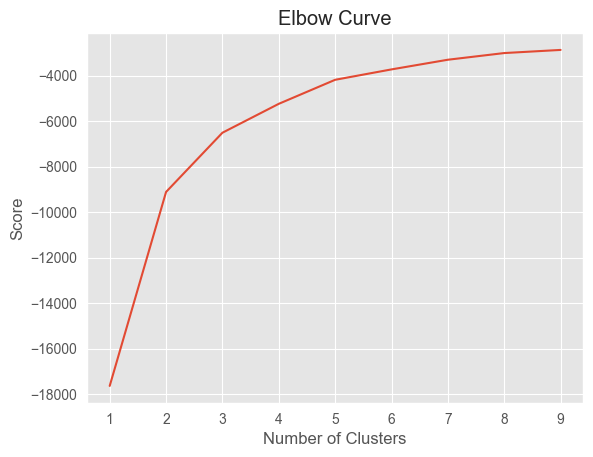

In [72]:
plt.plot(cluster_iteration,scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.xticks(cluster_iteration)
plt.style.use('ggplot')
plt.show()

#### Inference
- From the Elbow Curve, we found that optimal **number of clusters (n_clusters) is 5**

#### Method-2: Using `.inertia_` method (Within-Cluster Sum of Sqaures)

In [73]:
from sklearn.cluster import KMeans

cluster_iteration = range(1,10)
inertias = []

for cluster_number in cluster_iteration:
    K_Means = KMeans(n_clusters=cluster_number, random_state=45)
    K_Means.fit(rfm_normalized)
    inertias.append(K_Means.inertia_)

#### Elbow Curve (Number of Clusters Vs Inertia)

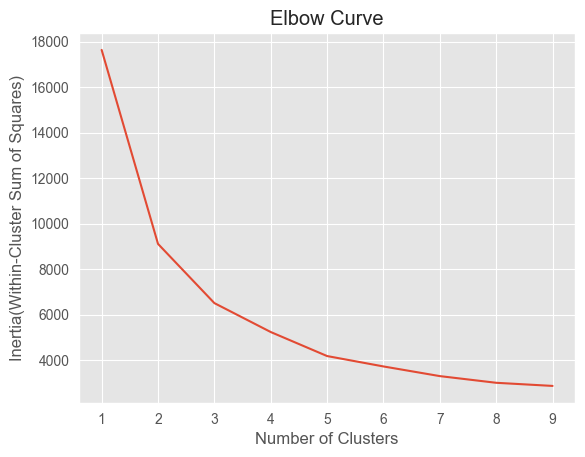

In [74]:
plt.plot(cluster_iteration,inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia(Within-Cluster Sum of Squares)')
plt.title('Elbow Curve')
plt.xticks(cluster_iteration)
plt.style.use('ggplot')
plt.show()

#### Inference
- From the Elbow Curve, we found that optimal **number of clusters (n_clusters) is 5**

### Final Model with number of clusters(n_cluster) = 5

In [75]:
K_Means_final_model = KMeans(n_clusters= 5, random_state=45)
K_Means_final_model.fit(rfm_normalized)

KMeans(n_clusters=5, random_state=45)

In [76]:
cluster_labels = K_Means_final_model.labels_

In [77]:
cluster_labels

array([0, 0, 4, ..., 2, 3, 0], shape=(5878,), dtype=int32)

In [78]:
rfm['Cluster'] = cluster_labels

In [79]:
rfm.head()

,Customer ID,Monetary,Frequency,Recency,Cluster
0,12346.0,77556.46,34,325,0
1,12347.0,5633.32,253,1,0
2,12348.0,2019.40,51,74,4
3,12349.0,4428.69,175,18,0
4,12350.0,334.40,17,309,1


In [80]:
rfm.groupby('Cluster').agg({'Recency': 'mean',
                            'Frequency': 'mean',
                            'Monetary': ['mean', 'count'],}).round(0)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          45.0     454.0  11073.0  1209
1         109.0      17.0    359.0  1007
2         533.0      13.0    249.0   887
3         411.0      67.0   1147.0  1035
4          66.0      91.0   1487.0  1740

#### Inference

- **Cluster_0:**	1209
- **Cluster_1:**	1007
- **Cluster_2:**	887
- **Cluster_3:**	1035
- **Cluster_4:**	1740

In [81]:
rfm_scores['Cluster'] = cluster_labels

In [82]:
rfm_scores

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Sum,RFM_Score_Segment,Segment_New,Cluster
0,12346.0,77556.46,34,325,2,2,5,9,225,Big Spenders,0
1,12347.0,5633.32,253,1,5,5,5,15,555,Best Customers,0
2,12348.0,2019.40,51,74,3,3,4,10,334,Big Spenders,4
3,12349.0,4428.69,175,18,5,4,5,14,545,Best Customers,0
4,12350.0,334.40,17,309,2,2,2,6,222,Almost Lost,1
...,...,...,...,...,...,...,...,...,...,...,...
5873,18283.0,2736.65,986,3,5,5,4,14,554,Best Customers,0
5874,18284.0,461.68,28,431,1,2,2,5,122,Lost Customers,3
5875,18285.0,427.00,12,660,1,1,2,4,112,Lost Customers,2
5876,18286.0,1296.43,67,476,1,3,4,8,134,Big Spenders,3


<Figure size 1000x600 with 0 Axes>

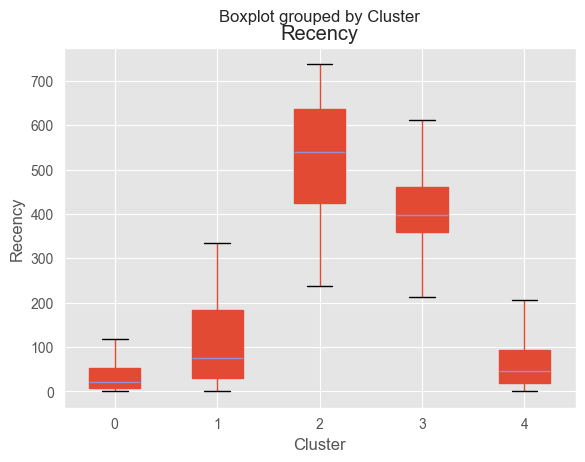

In [83]:
plt.figure(figsize=(10, 6))
rfm_scores.boxplot(column='Recency', by='Cluster', patch_artist=True, showfliers=False)
plt.xlabel('Cluster')
plt.ylabel('Recency')
plt.show()

<Figure size 1000x600 with 0 Axes>

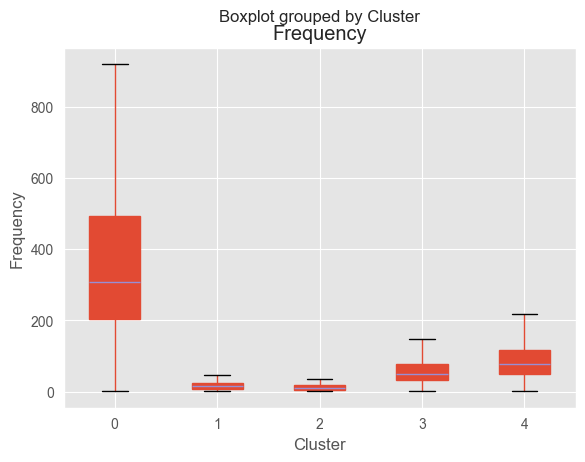

In [84]:
plt.figure(figsize=(10, 6))
rfm_scores.boxplot(column='Frequency', by='Cluster', patch_artist=True, showfliers=False)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

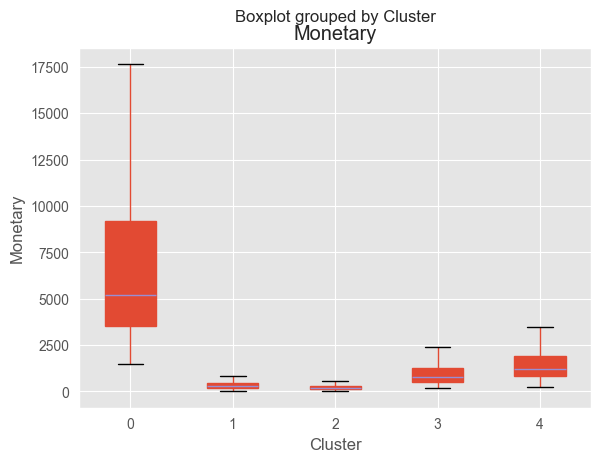

In [85]:
plt.figure(figsize=(10, 6))
rfm_scores.boxplot(column='Monetary', by='Cluster', patch_artist=True, showfliers=False)
plt.xlabel('Cluster')
plt.ylabel('Monetary')
plt.show()

In [95]:
from sklearn.metrics import silhouette_samples

cluster_labels = K_Means_final_model.labels_

rfm['Cluster'] = cluster_labels

silhouette_vals = silhouette_samples(rfm_normalized, cluster_labels)

max_silhouette = silhouette_vals.max()

print(f"Maximum Silhouette Score: {max_silhouette:.3f}")



Maximum Silhouette Score: 0.640


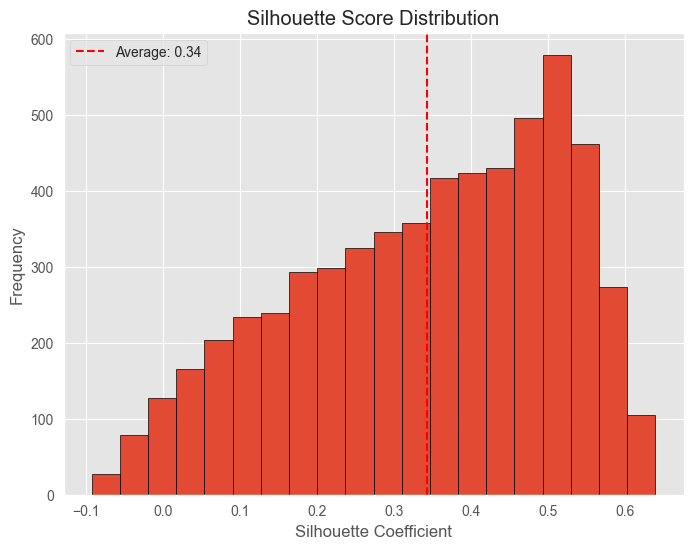

In [96]:
import matplotlib.pyplot as plt

silhouette_vals = silhouette_samples(rfm_normalized, cluster_labels)

plt.figure(figsize=(8, 6))
plt.hist(silhouette_vals, bins=20, edgecolor='black')
plt.axvline(x=max_silhouette, color='red', linestyle='--', label=f'Average: {max_silhouette:.2f}')
plt.title('Silhouette Score Distribution')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.show()


##  Model-II : DBSCAN Model Clustering

In [97]:
eps_values = np.arange(0.5,4,0.25)
min_samples = np.arange(5,12)
DBSCAN_params = list(product(eps_values, min_samples))

In [98]:
no_of_clusters = []
sil_score = []
for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(rfm_normalization)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(rfm_normalization, DBS_clustering.labels_))

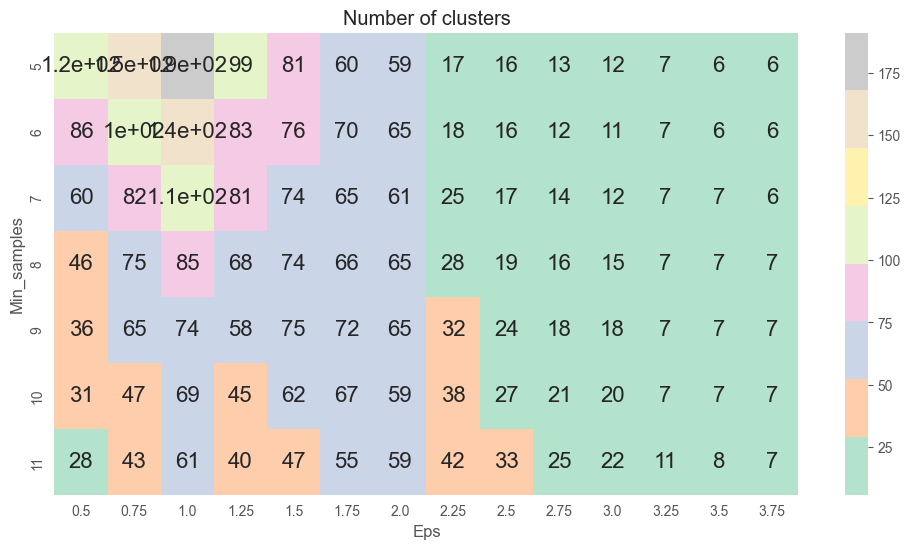

In [103]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="Pastel2", ax=ax)
ax.set_title('Number of clusters')
plt.show()

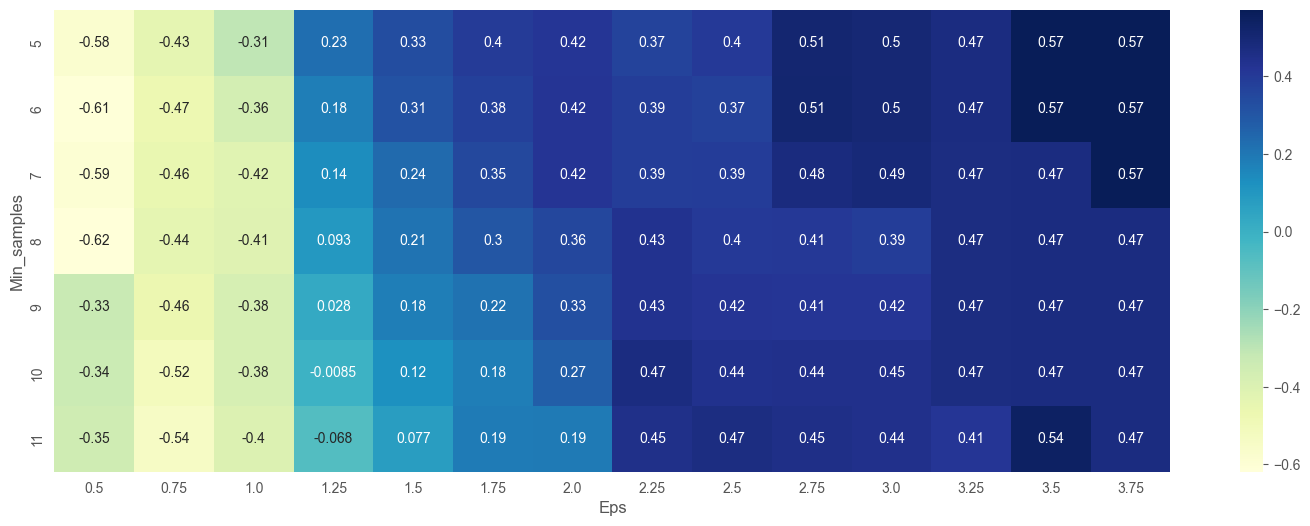

In [105]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [106]:
DBS_clustering = DBSCAN(eps=3.75, min_samples=6).fit(rfm_normalization)

DBSCAN_clustered = rfm_normalization.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [107]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,6
0,3731
1,486
2,1330
3,236
4,89


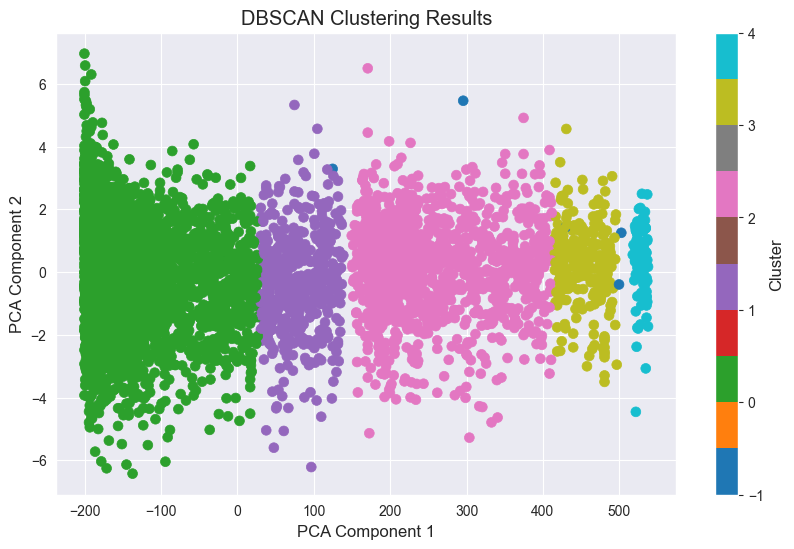

In [118]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(DBSCAN_clustered.drop(columns='Cluster'))

plt.figure(figsize=(10,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=DBSCAN_clustered['Cluster'], cmap='tab10', s=50)
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

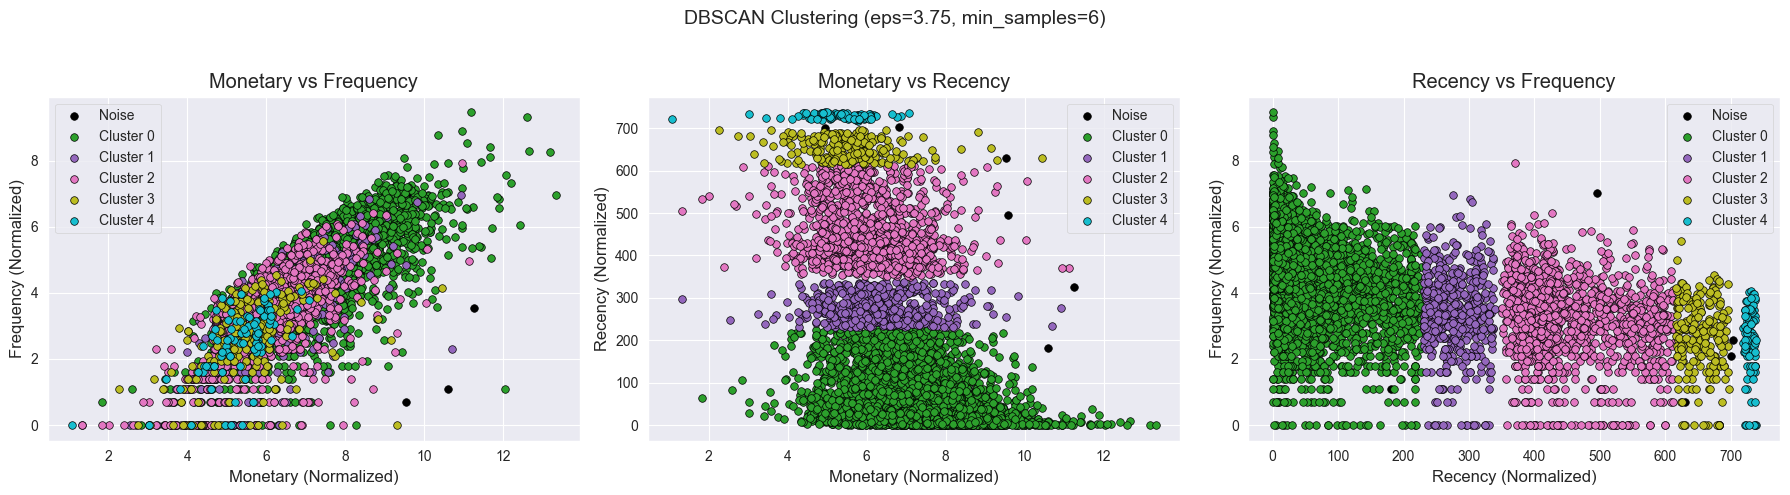

In [108]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Clustering ---
eps_value = 3.75
min_samples_value = 6
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(rfm_normalization)

# --- Create DataFrame for plotting ---
rfm_dbscan_result = pd.DataFrame(rfm_normalization, columns=['Recency', 'Frequency', 'Monetary'])
rfm_dbscan_result['Cluster'] = dbscan_labels

# --- Plotting ---
plt.figure(figsize=(18, 5))
unique_labels = np.unique(dbscan_labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

# Plot 1: Monetary vs Frequency
plt.subplot(1, 3, 1)
for i, label in enumerate(unique_labels):
    cluster_data = rfm_dbscan_result[rfm_dbscan_result['Cluster'] == label]
    color = 'k' if label == -1 else colors(i)
    label_name = 'Noise' if label == -1 else f'Cluster {label}'
    plt.scatter(cluster_data['Monetary'], cluster_data['Frequency'], c=color, s=30, label=label_name, edgecolors='k')
plt.title("Monetary vs Frequency")
plt.xlabel("Monetary (Normalized)")
plt.ylabel("Frequency (Normalized)")
plt.legend()
plt.grid(True)

# Plot 2: Monetary vs Recency
plt.subplot(1, 3, 2)
for i, label in enumerate(unique_labels):
    cluster_data = rfm_dbscan_result[rfm_dbscan_result['Cluster'] == label]
    color = 'k' if label == -1 else colors(i)
    label_name = 'Noise' if label == -1 else f'Cluster {label}'
    plt.scatter(cluster_data['Monetary'], cluster_data['Recency'], c=color, s=30, label=label_name, edgecolors='k')
plt.title("Monetary vs Recency")
plt.xlabel("Monetary (Normalized)")
plt.ylabel("Recency (Normalized)")
plt.legend()
plt.grid(True)

# Plot 3: Recency vs Frequency
plt.subplot(1, 3, 3)
for i, label in enumerate(unique_labels):
    cluster_data = rfm_dbscan_result[rfm_dbscan_result['Cluster'] == label]
    color = 'k' if label == -1 else colors(i)
    label_name = 'Noise' if label == -1 else f'Cluster {label}'
    plt.scatter(cluster_data['Recency'], cluster_data['Frequency'], c=color, s=30, label=label_name, edgecolors='k')
plt.title("Recency vs Frequency")
plt.xlabel("Recency (Normalized)")
plt.ylabel("Frequency (Normalized)")
plt.legend()
plt.grid(True)

plt.suptitle(f"DBSCAN Clustering (eps={eps_value}, min_samples={min_samples_value})", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [109]:
labels = DBSCAN_clustered['Cluster'].values

X = DBSCAN_clustered[['Recency', 'Monetary']].values

if len(set(labels)) > 1 and len(set(labels)) - (1 if -1 in labels else 0) > 1:
    sil_score = silhouette_score(X, labels)
    print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5721


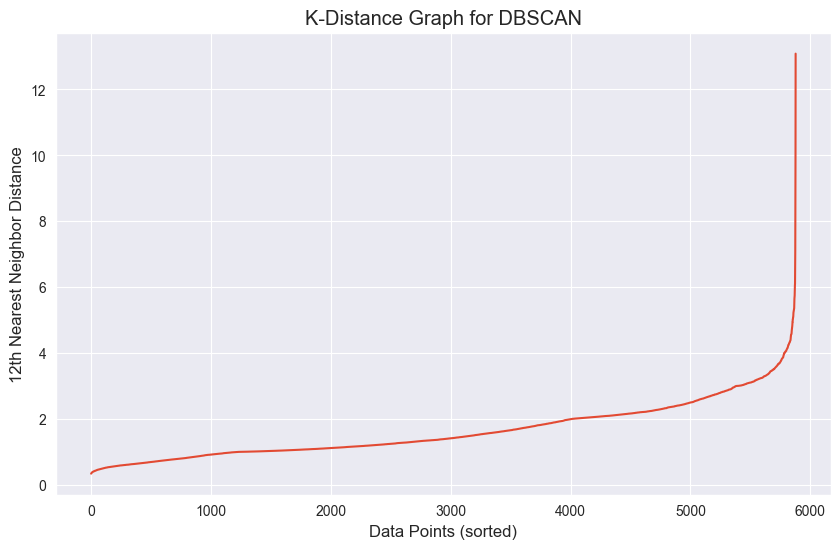

In [110]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

k = 12
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(rfm_normalization)

distances, indices = neighbors_fit.kneighbors(rfm_normalization)

k_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.xlabel("Data Points (sorted)")
plt.ylabel(f"{k}th Nearest Neighbor Distance")
plt.title("K-Distance Graph for DBSCAN")
plt.grid(True)
plt.show()


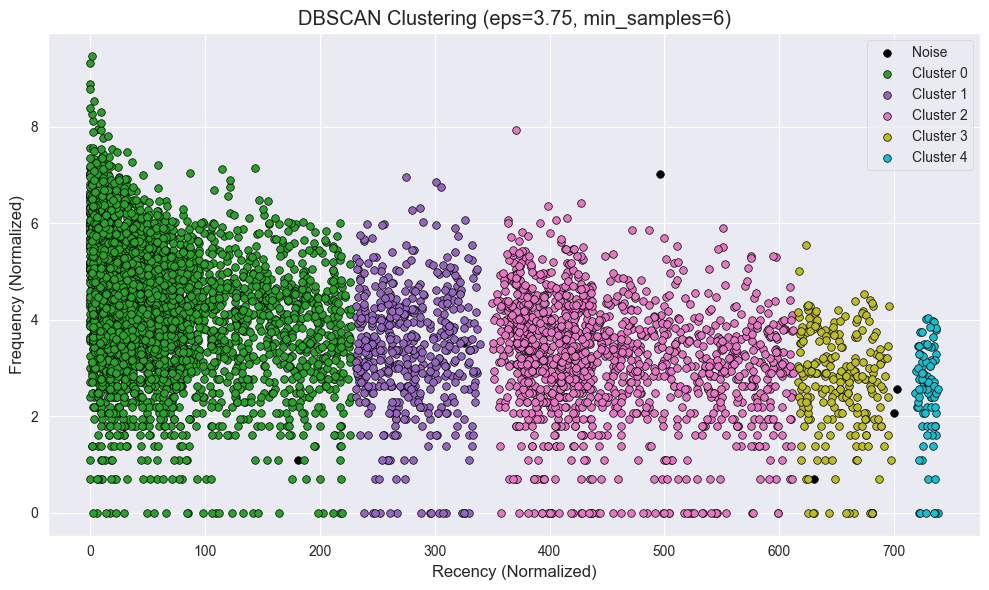

In [116]:
# DBSCAN clustering
eps_value = 3.75
min_samples_value = 6
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(rfm_normalization)

# دمج النتائج
rfm_dbscan_result = pd.DataFrame(rfm_normalization, columns=['Recency', 'Frequency', 'Monetary'])
rfm_dbscan_result['Cluster'] = dbscan_labels

plt.figure(figsize=(10, 6))
unique_labels = np.unique(dbscan_labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for i, label in enumerate(unique_labels):
    cluster_data = rfm_dbscan_result[rfm_dbscan_result['Cluster'] == label]
    color = 'k' if label == -1 else colors(i)
    label_name = f"Cluster {label}" if label != -1 else "Noise"
    plt.scatter(cluster_data['Recency'], cluster_data['Frequency'], c=[color], s=30, label=label_name, edgecolors='k')

plt.title(f"DBSCAN Clustering (eps={eps_value}, min_samples={min_samples_value})")
plt.xlabel("Recency (Normalized)")
plt.ylabel("Frequency (Normalized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [112]:
unique, counts = np.unique(labels, return_counts=True)
cluster_summary = pd.DataFrame({'Cluster': unique, 'Size': counts})
print(cluster_summary.sort_values(by='Size', ascending=False))


   Cluster  Size
1        0  3731
3        2  1330
2        1   486
4        3   236
5        4    89
0       -1     6


#  8) Developing a recommendation system based on user purchasing patterns.

In [113]:
df = retail.copy()
# Aggregate quantity by Customer and Product
user_product_matrix = df.pivot_table(index='Customer ID', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)

# Ensure 'Customer ID' in user_product_matrix is of integer type before computing similarity
user_product_matrix.index = user_product_matrix.index.astype(str).str.replace('.0', '').astype(int)
# Compute cosine similarity between users
user_similarity = cosine_similarity(user_product_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_product_matrix.index, columns=user_product_matrix.index)

def recommend_items(user_id, top_n=5):
    if user_id not in user_similarity_df.index:
        print("Valid CustomerIDs:", [str(i) for i in user_similarity_df.index.tolist()[:10]]) # Changed int(i) to str(i)
        return "User not found."

    # Find similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).drop(user_id).head(top_n).index
    user_items = set(df[df['Customer ID'] == user_id]['Description'])

    # Get items from similar users not seen by current user
    recommendations = df[df['Customer ID'].isin(similar_users)]
    recommendations = recommendations[~recommendations['Description'].isin(user_items)]

    # Rank by popularity among similar users
    top_items = recommendations.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(top_n)
    return top_items.index.tolist()

In [117]:
# Ensure CustomerID and index are integers for consistency
df['Customer ID'] = df['Customer ID'].astype(float).astype(int)
user_product_matrix.index = user_product_matrix.index.astype(float).astype(int)

# Get valid Customer IDs
valid_customer_ids = user_product_matrix.index.tolist()

# Prompt user
print("Choose an option:")
print("1 - Pick from suggested Customer IDs")
print("2 - Enter your own Customer ID")

choice = input("Enter 1 or 2: ")

if choice == "1":
    # Show example CustomerIDs with index numbers
    for idx, cid in enumerate(valid_customer_ids[:10]):
        print(f"{idx}: Customer ID {cid}")
    selected_index = int(input("Select which Customer ID you want to use: "))
    if 0 <= selected_index < len(valid_customer_ids[:10]):
        selected_id = valid_customer_ids[selected_index]
    else:
        print("Invalid selection number, using default.")
        selected_id = valid_customer_ids[0]
elif choice == "2":
    selected_id = int(input("Enter your Customer ID: "))
else:
    print("Invalid input. Defaulting to the first valid ID.")
    selected_id = valid_customer_ids[0]

# Run recommendation
print(f"Recommendations for Customer {selected_id}:")
print(recommend_items(selected_id))

Choose an option:
1 - Pick from suggested Customer IDs
2 - Enter your own Customer ID
Recommendations for Customer 12346:
['RED PUDDING SPOON', 'WOODEN HEART CHRISTMAS SCANDINAVIAN', 'BLUE PUDDING SPOON', 'LARGE CHINESE STYLE SCISSOR', 'SMALL CHINESE STYLE SCISSOR']
